<div align="left">
# Capstone Project - Recommender System for Recipes
## Machine Learning Engineer Nanodegree
#### Claudia Cassidy, March 31, 2018
</div>
<hr>

### Analysis

AllRecipes.com is a community based website where people, mostly home cooks, submit their own recipes and have them published on the website. Most of the people who contribute recipes are not professional chefs.<br>

I was able to generate a dataset of over 8,100 recipes by scraping the web pages of AllRecipes.com.  An example of the script I wrote to scrape the recipes is in file "arSaladR.py". Recipes were scraped by categories as defined by AllRecipes.com. Using BeautifulSoup I scraped recipes in categories such as chicken, beef, salad, bread, pasta, vegetarian, cookies, beans, fish, and more. The data was written to csv files and then combined into a master spreadsheet.  

### Data Structure

Recipes on AllRecipes.com are structured according to Google's Recipe schema. Once scraped, the recipes were broken down into the following fields:<br>


<li>title: recipe name
<li>url: link to the original recipe on AllRecipes.com
<li>category: one category that this recipe falls in, as defined by AllRecipes.com
<li>prep time: how long it takes to prepare the ingredients before they are cooked
<li>cook time: how long it takes to cook
<li>total time: how long it takes to make this recipe: total of preparation time plus cooking time
<li>servings: number of servings this recipe makes
<li>rating: average overall rating for this recipe
<li>review_count: number of reviews this recipe has received
<li>categories: an array of food categories that this recipe falls in, as defined by AllRecipes.com
<li>author: the person who contributed the recipe
<li>ingredients: array of ingredients
<li>instructions: array of instructions for how to make the recipe
<li>fat: health information: amount of fat per serving
<li>calories: health information: amount of calories per serving
<li>carbohydrates: health information: amount of carbohydrates per serving
<li>protein: health information: amount of protein per serving
<li>cholesterol: health information: amount of cholesterol per serving
<li>sodium: health information: amount of sodium per serving
<li>reviews_text: the text of up to 6 reviews<br>
<br>
The fields which I selected from the dataset are title, categories, category and ingredients. I also experimented with rating and review_count. Here is a sample of the data.


In [121]:
#import needed packages

import re
import pandas as pd
import numpy as np
import copy


### Data Exploration


The master dataset was trimmed down to use the fields: title, category, categories, ingredients, rating and review_cnt. 

In [364]:
#dataMaster = pd.read_csv("dataRecMaster2.csv") 
dataMaster = pd.read_csv("dataRecipeMaster.csv") 

#dataMaster.head(5)

In [365]:

data = dataMaster[['title','category','categories','ingred','rating','review_cnt','reviews_text']].copy()
#data.head(5)

### Data Cleaning

When looking at the data, it became clear that the most relevant words are the names of food items and categories.  Other words, characters and numbers would not be useful for this exercise. for example, we need to get rid of stop words (common words like "as", "the") and measurement words (for example 1/2 tablespoon) which don't say anything about the food. <br>
For example, "ground beef" becomes "groundbeef", "beef bouillon cube" becomes "beefbouilloncube".

The first step was to define a food vocabulary. Non-food words, such as measurements, punctuation, and descriptions about the state of a food item should be removed from the ingredients. Shown here is a function to remove non-food words from the ingredient words: "clean_data_ingred()".

In [366]:
### removed measurements, descriptive words and anything that's not an ingredient
def clean_data_ingred(ds):
    arr = [' to ',' or ', ' into ', ' more',' cut ', 'tablespoons','tablespoon','teaspoons','teaspoon','cups','cup',
           'ounces','ounce','pounds','pound','pinches','pinch','tastes',
           'taste','dashes','dash','/',' as ',' and ', '-','[',']','deveined',
           '(',')','.','slices','sliced','slice', '0','1','2','3', 'cover',
           '4','5','6','7','8','9','juiced','diced','minced','chopped',
           ' cans',' canned ', ' can ', ' inches ', ' inch ','package', 
           'finely', 'crushed', 'shredded', 'divided', ' melted ', ' jar ',
           'thawed', ' cut ', ' to ', ' thick ', ' across ',' bones ', 
           'optional', ' split ', ' torn ', ' into ', ' strips ', 'peeled',
           ' pieces', ' lightly ', ' beaten ','ground black', 'scrubbed', 
           'jars', 'beaten','pitted','halved', 'thinly','as needed','large',
           'medium','small','roughly','fluid','drained','crumbled','rinsed',
           'cubed','seeded','fresh',' plus ', ' more ', 'deboned', 
           'prepared', 'cubes', 'uncooked', 'cooked', 'grated', ' lean ',
           'into chunks', 'coarsely','seeded','freshly',' freshly', 'fresh',
           ' with ',  'liquid','quartered','lengthwise','small',' into ',
           ' bite ', ' sized ', ' ly ', ' ed ', ' s ','cut into', ' up ', 
           'trimmed','frozen','chunks','segments','softened',' cut ', 
           ' stewed','pieces','broken',' cored',' rings',' torn ','seasoned',
           ' into ','eighths','quarters','halves','thirds',' thick ', 'scoop',
           'chilled','skinned', "'"]

    ### merge terms that have multiple words, for example 'ground beef' becomes 'groundbeef'
    for item in arr:
        ds = ds.str.replace(item,'')
    ds = ds.str.replace('saltpepper',"salt,pepper")
    ds = ds.str.replace('cloves',"clove")
    ds = ds.str.replace(',more,',",")
    ds = ds.str.replace('halfandhalf',"half and half")
    ds = ds.str.replace(',or,','')
    ds = ds.str.replace(', or,','')


    ds = ds.str.replace(' ,',"")

   # ds = ds.str.replace(' ',"_")

    
    ds = ds.str.replace(',,',',')
    
    ds = ds.str.strip()
    ds = ds.str.replace('  ','')
    ds = ds.str.replace('   ','')
    ds = ds.str.replace('    ','')
    ds = ds.str.replace('     ','')
    ds = ds.str.replace('      ','')
    ds = ds.str.replace('       ','')
    ds = ds.str.replace('        ','')
    ds = ds.str.replace('         ','')
    ds = ds.str.replace('          ','')
        
    ds = ds.str.replace(' ',"_")
    ds = ds.str.replace(',_',",")
    ds = ds.str.replace('_'," ")

    ds = ds.str.replace(' ',"_")

    ds = ds.str.replace(','," ")
    
    return ds

In [367]:
### Remove measurements and anything else that is not a food ingredient from the ingredients data

# Before cleaning
print(data['ingred'].head(10))

data['ingred'] = clean_data_ingred(data['ingred'])

# After cleaning
data['ingred'].head(10)

0    ['2 (15 ounce) cans black beans, rinsed and dr...
1    ['1 tablespoon vegetable oil', '1/2 small whit...
2    ['1 tablespoon oil, peanut or sesame', '2 clov...
3    ['2 cups elbow macaroni', '1/4 cup butter, div...
4    ['water to cover', '1 cup dried lentils', '1/2...
5    ['1 cup frozen cut green beans', '1 cup frozen...
6    ['4 cups water, or as needed', '1/4 cup apple ...
7    ['1 (15 ounce) can tomato sauce', '1/4 cup wat...
8    ['1 1/2 cups frozen strawberries, divided', '1...
9    ['1 large head cauliflower', '1 cup half-and-h...
Name: ingred, dtype: object


0    black_beans chicken_broth tomato_paste ground_...
1    vegetable_oil white_onion clove_garlic zucchin...
2    oil peanutsesame clove_garlic green_beans whit...
3    elbow_macaroni butter onion allpurpose_flour m...
4    water dried_lentils wheat_germ onion green_bel...
5    green_beans lima_beans red_beans red_bell_pepp...
6    water apple_cider_vinegar seafood_seasoning_su...
7    tomato_sauce water envelope_taco_seasoning_mix...
8    strawberries soy_milk blueberries s_acai_powde...
9    head_cauliflower half_and_half pepper garlic_p...
Name: ingred, dtype: object

## Analysis

The next step was to compute TF-IDF scores for the remaining words. Ingredient terms can consist of more than one word. In order to make sure that the model does not treat an ingredient like "ground beef" as two separate words, for example "ground" and "beef", ingredients with multiple words were combined into a single word. For example, "ground beef" becomes "groundbeef" and "beef bouillon cube" becomes "beefbouilloncube". Each term was then separated by a space.

### Data Cleaning

### Adding Categories Feature
As we did with the ingredients data, we will remove characters from the Categories data which are not letters, for example, punctuation marks. Multiple word terms will be combined into single words, for example: "side dish" becomes "sidedish".

In [368]:
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

In [369]:
# convert categories to lowercase, remove punctuation
def clean_categories(ds):
    ds = ds.str.lower()
    ds = ds.str.replace(', ','')
    ds = ds.str.replace('[','')
    ds = ds.str.replace(']','')
    ds = ds.str.replace("''",',')    
    ds = ds.str.replace(' ','_')
    ds = ds.str.replace("'","")
    ds = ds.str.replace(","," ")


    ds = ds.str.strip()

    return ds

In [370]:
# Categories
# before cleaning
print(data['categories'].head(5))

data['categories_clean'] = clean_categories(data['categories'])

#after cleaning
print(data['categories_clean'].head(5))


0               ['Side Dish', 'Beans and Peas']
1       ['Side Dish', 'Vegetables', 'Tomatoes']
2    ['Side Dish', 'Vegetables', 'Green Beans']
3       ['Pasta and Noodles', 'Pasta by Shape']
4                          ['Everyday Cooking']
Name: categories, dtype: object
0            side_dish beans_and_peas
1       side_dish vegetables tomatoes
2    side_dish vegetables green_beans
3    pasta_and_noodles pasta_by_shape
4                    everyday_cooking
Name: categories_clean, dtype: object


In [371]:
# convert category to lowercase, remove punctuation
def clean_category(ds):
#    ds = ds.str.lower()
#    ds = ds.str.replace(', ','')
#    ds = ds.str.replace('[','')
#    ds = ds.str.replace(']','')
#    ds = ds.str.replace("''",',')    
#    ds = ds.str.replace(' ','_')
#    ds = ds.str.replace("'","")
#    ds = ds.str.strip()
    
    ds = ds.str.lower()
    
    ds = ds.str.replace('[','')
    ds = ds.str.replace(']','')
    ds = ds.str.replace("''",' ')
    ds = ds.str.replace(',',' ')
    ds = ds.str.replace("'","")
    
    ds = ds.str.strip()
    ds = ds.str.replace('  ','')
    ds = ds.str.replace('   ','')
    ds = ds.str.replace('    ','')
    ds = ds.str.replace('     ','')
    ds = ds.str.replace('      ','')
    ds = ds.str.replace('       ','')
    ds = ds.str.replace('        ','')
    ds = ds.str.replace('         ','')
    ds = ds.str.replace('          ','')
        
    ds = ds.str.replace(' ',"_")
    ds = ds.str.replace(',_',",")
    ds = ds.str.replace('_'," ")

    ds = ds.str.replace(' ',"_")    
    
    
    
    return ds

In [372]:
data['category_clean'] = clean_category(data['category'])

print(data['category_clean'].head(5))

0      beans_and_peas
1            tomatoes
2         green_beans
3      pasta_by_shape
4    everyday_cooking
Name: category_clean, dtype: object


In [373]:
# convert titles to lowercase, remove punctuation
def clean_titles(ds):
    ds = ds.str.replace('[','')
    ds = ds.str.replace(']','')
    ds = ds.str.replace("'","")
    ds = ds.str.replace('"','')
    ds = ds.str.replace('(','')
    ds = ds.str.replace(')','')
    ds = ds.str.replace('!','')
    ds = ds.str.replace('-',' ')
    ds = ds.str.lower()
    return ds


data['title_clean'] = clean_titles(data['title'])

print(data['title_clean'].head(5))

0                 anything goes easy black beans
1    calabacitas guisada stewed mexican zucchini
2                     chinese buffet green beans
3             got some crust macaroni and cheese
4         meats too expensive vegetarian burgers
Name: title_clean, dtype: object


#### Most common ingredients

In [374]:
df = data['ingred']
arr = []
for item in df:
    item2 = item.split(' ')
    for s in item2:
        if len(s) > 1:
            arr.append(s)
 
arr.sort()

import collections
counter = collections.Counter(arr)

df2 = pd.DataFrame.from_dict({"Most_Common_Ingredients":counter.most_common(10)})
df2['Most_Common_Ingredients'].apply(pd.Series)

df2[['ingred', 'count']] = df2['Most_Common_Ingredients'].apply(pd.Series)

num_recipes = len(data)
df2['percent'] = df2['count']/num_recipes

print(df2.head(10))

    Most_Common_Ingredients            ingred  count   percent
0              (salt, 4421)              salt   4421  0.419370
1            (pepper, 3414)            pepper   3414  0.323847
2             (onion, 2993)             onion   2993  0.283912
3      (clove_garlic, 2712)      clove_garlic   2712  0.257257
4         (olive_oil, 2316)         olive_oil   2316  0.219693
5            (butter, 2230)            butter   2230  0.211535
6             (water, 1839)             water   1839  0.174445
7  (allpurpose_flour, 1123)  allpurpose_flour   1123  0.106526
8       (white_sugar, 1092)       white_sugar   1092  0.103586
9     (vegetable_oil, 1035)     vegetable_oil   1035  0.098179


In [375]:
df2_plot = df2[['count','ingred','percent']]

df2_plot.head(10)



,count,ingred,percent
0,4421,salt,0.419370
1,3414,pepper,0.323847
2,2993,onion,0.283912
3,2712,clove_garlic,0.257257
4,2316,olive_oil,0.219693
5,2230,butter,0.211535
6,1839,water,0.174445
7,1123,allpurpose_flour,0.106526
8,1092,white_sugar,0.103586
9,1035,vegetable_oil,0.098179


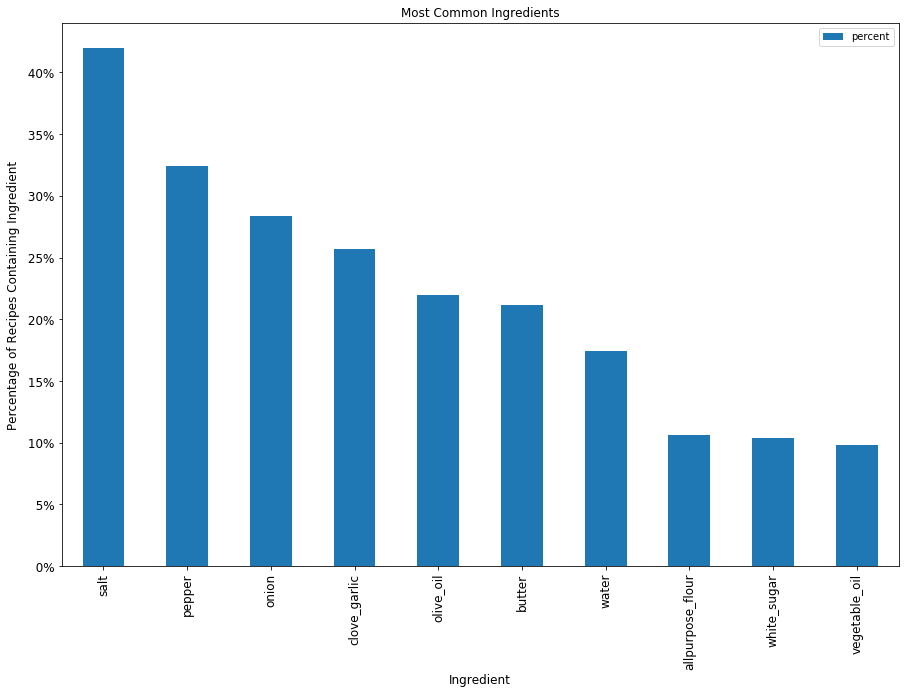

In [376]:
import matplotlib.pyplot as plt
ax = df2_plot[['ingred','percent']].plot(kind='bar', title ="Most Common Ingredients", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Ingredient", fontsize=12)
ax.set_ylabel("Percentage of Recipes Containing Ingredient", fontsize=12)

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

ax.set_xticklabels(df2_plot['ingred'])


plt.show()

#### Ingredients Word Cloud 
Shown below is a word cloud which illustrates how frequently some ingredients occur among all the recipes in our dataset.

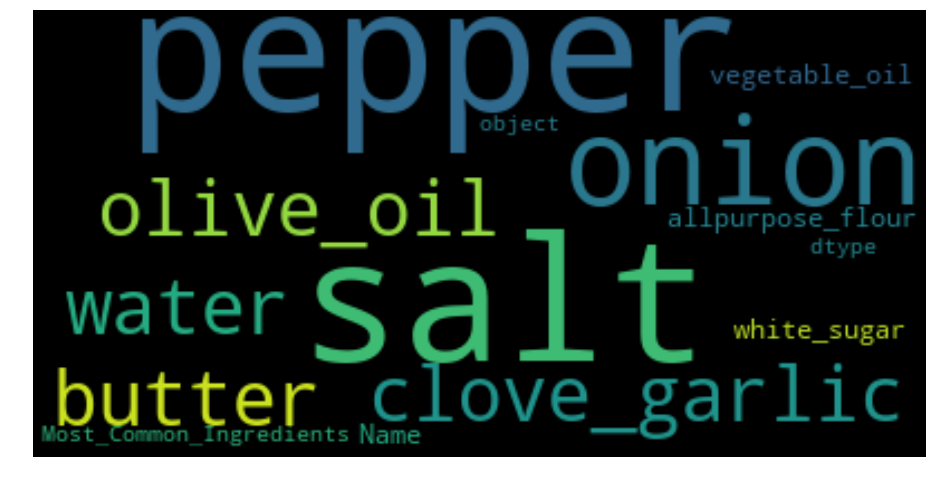

In [377]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df2['Most_Common_Ingredients']))

import matplotlib.pyplot as plt
                               
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



The largest words represent the most frequent occurrences of the ingredients in our dataset of recipes. The largest words, such as onion, oliveoil, butter, chickenbroth, clovesgarlic and vegetableoil can even be considered to be chef's call "staples", i.e. ingredients that are so frequently used that it can be assumed that every cook is well stocked with these items in their kitchens. For our purposes, these "high frequency" ingredients are less important because they are so common.

#### In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### Train, Test, Split

In [378]:
# select category_clean, ingred, title_clean and categories_clean
data2 = data[['category_clean','ingred','title_clean','categories_clean']]
data2['title_ingred'] = data['title_clean'] + data['category'] + data['ingred']

X_train = data2.sample(frac=0.8, random_state=1)
X_test = data2.loc[~data2.index.isin(X_train.index)]

X_train = X_train.fillna("")

category = data2[['categories_clean']]
cat_train = X_train['categories_clean']
cat_test = X_test['categories_clean']
#cat_train = category.sample(frac=0.8, random_state=1)
#cat_test = category.loc[~cat_train.index.isin(cat_train.index)]

#print(cat_test)



/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### CountVectorizer


In [379]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X_train.title_ingred)
X_train_counts.shape

#count_vect_test = CountVectorizer(stop_words='english')
#X_test_counts = count_vect.fit_transform(X_test.title_ingred)
#X_test_counts.shape



(8434, 16303)

CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [380]:
count_vect.vocabulary_.get('chicken')

3114

#### Compute tf and tf-idf

In [381]:
from sklearn.feature_extraction.text import TfidfTransformer 
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print("X_train_tf.shape: ",X_train_tf.shape)

#tf_transformer_test = TfidfTransformer(use_idf=False).fit(X_test_counts)
#X_test_tf = tf_transformer_test.transform(X_test_counts)
#print("X_test_tf.shape: ",X_test_tf.shape)


X_train_tf.shape:  (8434, 16303)


In [382]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

#tfidf_transformer_test = TfidfTransformer()
#X_test_tfidf = tfidf_transformer_test.fit_transform(X_test_counts)
#X_test_tfidf.shape



(8434, 16303)

#### Training a classifier

Now that we have our features, we can train a classifier to try to predict the category of a recipe title. We start with a naïve Bayes classifier, which provides a baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [383]:
from sklearn.naive_bayes import MultinomialNB

# train the MultinomialNB classifier to try to predict the categories of a recipe title or ingredient
clf = MultinomialNB().fit(X_train_tfidf, cat_train)



In [387]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, accuracy_score)

from sklearn.metrics import confusion_matrix


X_score = clf.score(X_train_tfidf,cat_train)

print("Accuracy: ",clf.score(X_train_tfidf,cat_train))

X_test_counts = count_vect.transform(X_test.title_ingred)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

predicted = clf.predict(X_test_tfidf)

print("Mean: ",np.mean(predicted == cat_test))

      
      

Accuracy:  0.28539245909414274
Mean:  0.21062618595825428


In [401]:
# predict a category given a recipe title or ingredients

ingred_new = ['lasagne','simple beef stew','chicken soup','brownsugar flour butter vanilla','potatoes celery onion ham milk']
X_new_counts = count_vect.transform(ingred_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(ingred_new, predicted):
    print('%r => %s' % (doc, category))
    


'lasagne' => world_cuisine european italian
'simple beef stew' => world_cuisine european italian
'chicken soup' => world_cuisine european italian
'brownsugar flour butter vanilla' => world_cuisine european italian
'potatoes celery onion ham milk' => world_cuisine european italian


#### Building a Pipeline

In [402]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])


text_clf.fit(X_train.title_ingred, cat_train) 




Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Evaluation of performance on the test set

In [403]:

predicted = text_clf.predict(X_test.title_ingred.values)

print(np.mean(predicted == cat_test))


0.21821631878557876


In [405]:
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='modified_huber', penalty='l2',
                            alpha=1e-3, random_state=42,
                            max_iter=5, tol=None)),
                    ])       
                    
text_clf.fit(X_train.title_ingred.values, cat_train)     
    
    
predicted = text_clf.predict(X_test.title_ingred.values)
np.mean(predicted == cat_test)  


0.6850094876660342

In [406]:
test_score = text_clf.score(X_test.title_ingred.values, cat_test) 

print('SVC test_score: {0:.3f}'.format(test_score))



SVC test_score: 0.685


In [408]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, accuracy_score)


print("Precision score: ",precision_score(cat_test, predicted, average="macro"))

print("Recall: ",recall_score(cat_test, predicted, average="macro"))    

print("Accuracy: ",accuracy_score(cat_test, predicted))    



Precision score:  0.5451892801169043
Recall:  0.4839088525891582
Accuracy:  0.6850094876660342


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [409]:
from sklearn import metrics

print(metrics.classification_report(cat_test, predicted,
                                    target_names = cat_test))


metrics.confusion_matrix(cat_test, predicted)


                                                                           precision    recall  f1-score   support

                                                 side_dish beans_and_peas       0.67      0.50      0.57         4
                                         side_dish vegetables green_beans       0.00      0.00      0.00         1
                      trusted_brands:_recipes_and_tips"campbells_kitchen"       1.00      0.75      0.86         8
                      trusted_brands:_recipes_and_tips"campbells_kitchen"       1.00      0.50      0.67         2
                      trusted_brands:_recipes_and_tips"campbells_kitchen"       0.00      0.00      0.00         1
                                     side_dish beans_and_peas baked_beans       0.61      0.83      0.70        23
                                   appetizers_and_snacks vegetable olives       1.00      1.00      1.00         2
                                         main_dish meatloaf beef_meatloaf      

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 386, does not match size of target_names, 2108
  .format(len(labels), len(target_names))
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 6, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Parameter tuning using grid search

We try out all classifiers on either words or bigrams, with or without idf, and with a penalty parameter of either 0.01 or 0.001 for the linear SVM:

In [410]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }
   
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

gs_clf = gs_clf.fit(X_train.title_ingred.values, cat_train)
   
    

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [411]:
gs_clf.best_score_

0.6579321792743656

### Given several ingredients, predict a category
Use Case:  I have several ingredients in the pantry, give me ideas for recipes

In [412]:
X_train.categories_clean[gs_clf.predict(['ground_beef ketchup',
                                         'ground_beef green_bell_peppers rice',
                                         'ziti ground_beef',
                                         'brown_sugar semisweet_chocolate_chips',
                                         'chicken soup',
                                         'steak',
                                         'black_beans tomato_sauce olives'])]


main_dish meatloaf beef_meatloaf            NaN
everyday_cooking                            NaN
world_cuisine european italian              NaN
desserts cookies drop_cookies               NaN
soupsstews_and_chili soup vegetable_soup    NaN
meat_and_poultry beef steaks                NaN
world_cuisine latin_american mexican        NaN
Name: categories_clean, dtype: object

In [413]:
X_train.categories_clean[gs_clf.predict(['lettuce tomatoes cucumber'])]

salad green_salads romaine_lettuce_salad    NaN
Name: categories_clean, dtype: object

In [414]:
# grid search best score

gs_clf.best_score_ 

0.6579321792743656

Show the best Parameters

In [416]:

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))



clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [417]:
df_results = gs_clf.cv_results_
df_results = pd.DataFrame(df_results)
print(df_results)

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       2.494863         0.171731         0.482452          0.664762   
1       5.004919         0.858799         0.451743          0.734427   
2       2.727249         0.170490         0.410244          0.536927   
3       4.705087         0.591639         0.407517          0.593445   
4       2.050193         0.389596         0.657932          0.974500   
5       3.954521         0.426893         0.635286          0.994693   
6       2.088704         0.181219         0.606118          0.930947   
7       3.653152         0.356752         0.600783          0.975277   

  param_clf__alpha param_tfidf__use_idf param_vect__ngram_range  \
0             0.01                 True                  (1, 1)   
1             0.01                 True                  (1, 2)   
2             0.01                False                  (1, 1)   
3             0.01                False                  (1, 2)   
4            0.0

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default an

The best results are in row 5.

In [419]:
print(df_results.ix[5].params)

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


#### Singular value decomposition and LSA

In [422]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_train_tfidf)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

Each LSA component is a linear combination of words

In [423]:
x = pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = count_vect.get_feature_names())


In [424]:

y = pd.DataFrame(dtm_lsa, index = cat_train, columns = ["ingred","title" ])



In [347]:
xs = [w[0] for w in dtm_lsa] 
ys = [w[1] for w in dtm_lsa]
xs, ys


([0.9006811118624338,
  0.9625662099393018,
  0.9790190577062065,
  0.7329151685694699,
  0.7782085732831315,
  0.9684060962318228,
  0.6187329024471303,
  0.9454221150174125,
  0.8343552862442412,
  0.8646891389230563,
  0.9527622725957062,
  0.8149770711157883,
  0.8250857316240517,
  0.9896790486142539,
  0.7709382852316361,
  0.9838149873030674,
  0.9621172265611856,
  0.7888942392595287,
  0.8092979218087745,
  0.8108342141322191,
  0.9522026655846098,
  0.9847362960180314,
  0.7466855842832182,
  0.7068563855817102,
  0.9569736467569895,
  0.9999500678175958,
  0.9975491512010062,
  0.854465286479032,
  0.9109963235405591,
  0.8790417285645776,
  0.8883047131311166,
  0.7737954630622406,
  0.8953623641446102,
  0.8152867085924158,
  0.6885857425654796,
  0.984986536449118,
  0.983311459776133,
  0.8444614263630381,
  0.7327174741288316,
  0.8882927377659015,
  0.9374767802568604,
  0.999722274273008,
  0.7171844866888474,
  0.7515286083626218,
  0.979959507461227,
  0.98421167202

Populating the interactive namespace from numpy and matplotlib


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


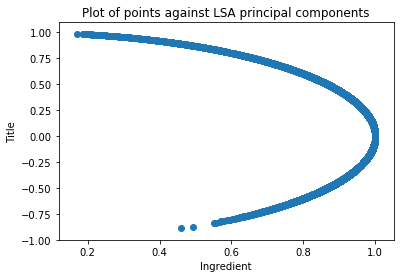

In [425]:
# Plot scatter plot of points 
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('Ingredient')
ylabel('Title')
title('Plot of points against LSA principal components')
show()

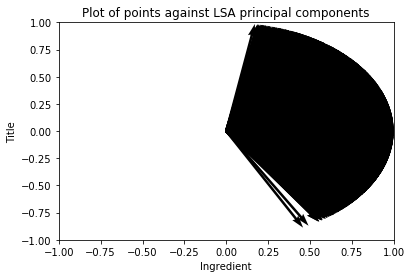

In [426]:
# Plot scatter plot of points with vectors %pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('Ingredient')
ylabel('Title')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()

We have reduced the number of dimensions to 2.<br>

Similar recipes point in similar directions. Dissimilar recipes have perpendicular (orthogonal) vectors. 

We can use cosine similarity for search by determining which recipe has the smallest angle with a given search term.


In [362]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity,index=cat_train, columns=X_train.title_clean).head(10)

title_clean,nanas beef stroganoff,split pea and ham soup ii,eggplant supper soup,turkey tetrazzini,black bean soup iii,sweet and sour pork tenderloin,authentic huevos rancheros,fresh corn and zucchini saute,ham casserole,fajita chili with knorr rice sides,...,mango black bean salad,savory slow cooker squash and apple dish,mushroom and spinach ravioli with chive butter sauce,yummy lemon salmon burgers,vegetarian tortilla stew,asian marinated asparagus,cake mix cookies iv,twice baked sweet potatoes,salmon tacos,sauteed portobellos and spinach
categories_clean,,,,,,,,,,,,,,,,,,,,,
world_cuisine european eastern_european russian,1.000000,0.749201,0.793250,0.955709,0.428061,0.980575,0.898610,0.709949,0.990986,0.560566,...,0.246117,0.999561,0.995448,0.873747,0.532976,0.671334,0.933022,0.999988,0.848976,0.788629
soupsstews_and_chili soup vegetable_soup,0.749201,1.000000,0.997601,0.521081,0.919296,0.864562,0.382637,0.998351,0.653714,0.968469,...,0.826360,0.768505,0.808915,0.976763,0.959735,0.993863,0.460696,0.752484,0.986056,0.998096
soupsstews_and_chili soup vegetable_soup,0.793250,0.997601,1.000000,0.578910,0.889849,0.897272,0.445670,0.991984,0.704527,0.948902,...,0.785398,0.810951,0.847670,0.989255,0.937989,0.983822,0.521027,0.796268,0.995210,0.999971
world_cuisine european italian,0.955709,0.521081,0.578910,1.000000,0.143116,0.879417,0.987939,0.471233,0.986522,0.292014,...,-0.050045,0.946565,0.923309,0.691900,0.260342,0.423468,0.997597,0.954234,0.655849,0.572735
soupsstews_and_chili soup cold_soups,0.428061,0.919296,0.889849,0.143116,1.000000,0.597011,-0.011859,0.940370,0.303129,0.988360,...,0.981304,0.454663,0.512244,0.813583,0.992836,0.957191,0.074203,0.432549,0.840983,0.893269
world_cuisine asian chinese,0.980575,0.864562,0.897272,0.879417,0.597011,1.000000,0.795097,0.834293,0.945459,0.712106,...,0.431446,0.985959,0.994805,0.952175,0.688586,0.803666,0.844321,0.981538,0.936133,0.893913
breakfast_and_brunch meat_and_seafood bacon,0.898610,0.382637,0.445670,0.987939,-0.011859,0.795097,1.000000,0.328977,0.949288,0.140398,...,-0.204090,0.885209,0.852705,0.571759,0.107699,0.278087,0.996293,0.896417,0.531050,0.438897
side_dish vegetables squash zucchini,0.709949,0.998351,0.991984,0.471233,0.940370,0.834293,0.328977,1.000000,0.609202,0.981172,...,0.857321,0.730513,0.773836,0.962851,0.974276,0.998574,0.408993,0.713441,0.974879,0.992910
main_dish pork ham,0.990986,0.653714,0.704527,0.986522,0.303129,0.945459,0.949288,0.609202,1.000000,0.444573,...,0.114050,0.986579,0.973707,0.800711,0.414817,0.565991,0.972816,0.990307,0.770530,0.699147
